# Laboratory of Computational Physics mod.B

## Fourth assignment

### Group name: LoCPdown
### Components:
* Campesan Giulia (2027592)
* Faorlin Tommaso (2021857)
* Marcomini Alessandro (2024286)

The aim of this notebook is to implement some techniques of unsupervised learning, in particular, the one concerning clustering.

In [1]:
#import packages
import numpy as np
import pandas as pd

from collections import OrderedDict

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

from IPython.display import Latex

# Part 1

### Data import and labelling
We import here the data for clustering. We append to each data-sequence its own a-priori known label, in order to get a comparison with our results. The dataset is composed of 800 samples living a five dimensional space. We know a priori that there are 3 different clusters to which samples belong and we will try to look for them in an 'unsupervised way'.

In [2]:
#importing the file of sequences
data = 'DATA/data_t-SNE_310101_d5_R100_e1_N800.dat'
columns=['x1','x2','x3','x4','x5']

#df_raw will not contain labels
df_raw = pd.read_csv(data, delimiter='\t',header=None, names=columns)
N=len(df_raw)

#creating a copy that contains labels
df = df_raw.copy(deep=True)

label0 = np.full(int(N*0.1),0)
label1 = np.full(int(N*0.3),1)
label2 = np.full(int(N*0.6),2)
label = np.concatenate([label0,label1,label2])


df['label'] = label

## Dataset visualisation
We here visualize the dataset, in which we highlighted the labelling through colours.

In [3]:
df.head(5)

,x1,x2,x3,x4,x5,label
0,-83065,29521,68815,-100340,-29235,0
1,-110304,38545,68519,-115776,-46287,0
2,-88908,31418,69174,-107023,-30120,0
3,-99298,32751,71580,-113674,-38766,0
4,-77225,29431,64216,-95754,-28018,0


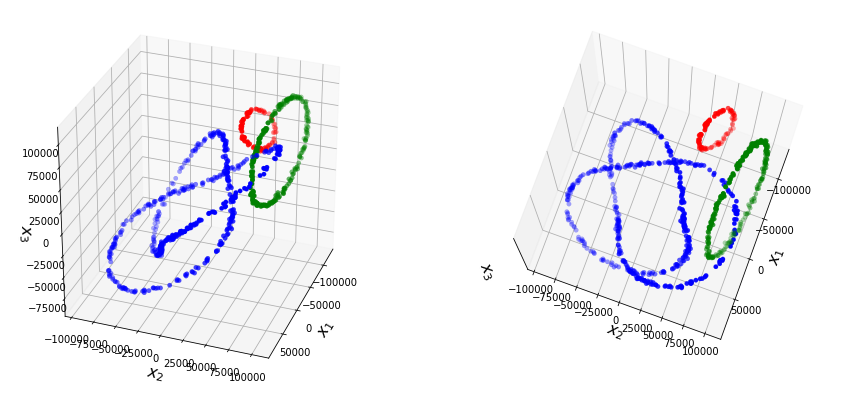

In [34]:
fig = plt.figure(figsize=(15,7))

red = df['label'] == 0
green = df['label'] == 1
blue = df['label'] == 2

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(df[red]['x1'], df[red]['x2'], df[red]['x3'], c='red', linewidth=0.2)
ax.scatter(df[green]['x1'], df[green]['x2'], df[green]['x3'], c='green', linewidth=0.2)
ax.scatter(df[blue]['x1'], df[blue]['x2'], df[blue]['x3'], c='blue', linewidth=0.2)
ax.set_xlabel('$x_1$', fontsize=16)
ax.set_ylabel('$x_2$', fontsize=16)
ax.set_zlabel('$x_3$', fontsize=16)
ax.view_init(30, 20)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(df[red]['x1'], df[red]['x2'], df[red]['x3'], c='red', linewidth=0.2)
ax.scatter(df[green]['x1'], df[green]['x2'], df[green]['x3'], c='green', linewidth=0.2)
ax.scatter(df[blue]['x1'], df[blue]['x2'], df[blue]['x3'], c='blue', linewidth=0.2)
ax.set_xlabel('$x_1$', fontsize=16)
ax.set_ylabel('$x_2$', fontsize=16)
ax.set_zlabel('$x_3$', fontsize=16)
ax.set_zticks([])
ax.view_init(80, 20)

plt.show()

## 2D t-SNE

### Random initialization

We now apply the t-SNE method to the dataset, looking for an embedded space of dimension 2, at first with random (default) initialisation. We will try later on to change it for example to 'pca'.

We represent the output of the t-SNE for 4 different perplexity values: 5, 30, 50, 100.
We repeat the same procedure 3 times in order to visualize the effect of the random initialization.

In particular, for the lowest value of perplexity the result changes abruptly when chaging initialization.
Increasing the perplexity the results are more stable and they appear to be only rotated.

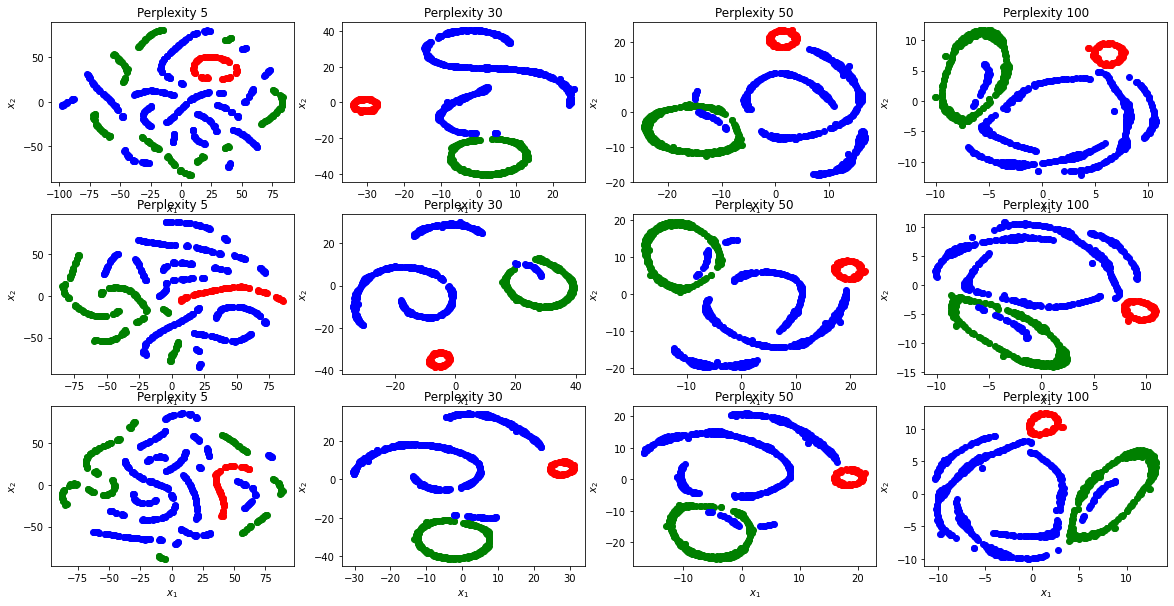

In [5]:
fig, ax = plt.subplots(3,4, figsize=(20,10))
perplexity_list = [5,30,50,100]

for i in range(3):
    for j in range(len(perplexity_list)):
        X_embedded = TSNE(n_components=2,  perplexity=perplexity_list[j]).fit_transform(df)
        x = np.array([X_embedded[j][0] for j in range(X_embedded.shape[0])] )
        y = np.array([X_embedded[j][1] for j in range(X_embedded.shape[0])] )
        ax[i][j].set_title(f'Perplexity {perplexity_list[j]}')
        ax[i][j].set_xlabel('$x_1$')
        ax[i][j].set_ylabel('$x_2$')
        ax[i][j].scatter(x[red],y[red], color = 'red')
        ax[i][j].scatter(x[green],y[green], color = 'green')
        ax[i][j].scatter(x[blue],y[blue], color = 'blue')

plt.show()

### PCA initialization
We now initialize the algorithm using the Principal Component Analysis. As expected, it turns
out to be more stable than random initialization, retrieving the same results for different trials. In addition, the result does not depend anymore on the perplexity.

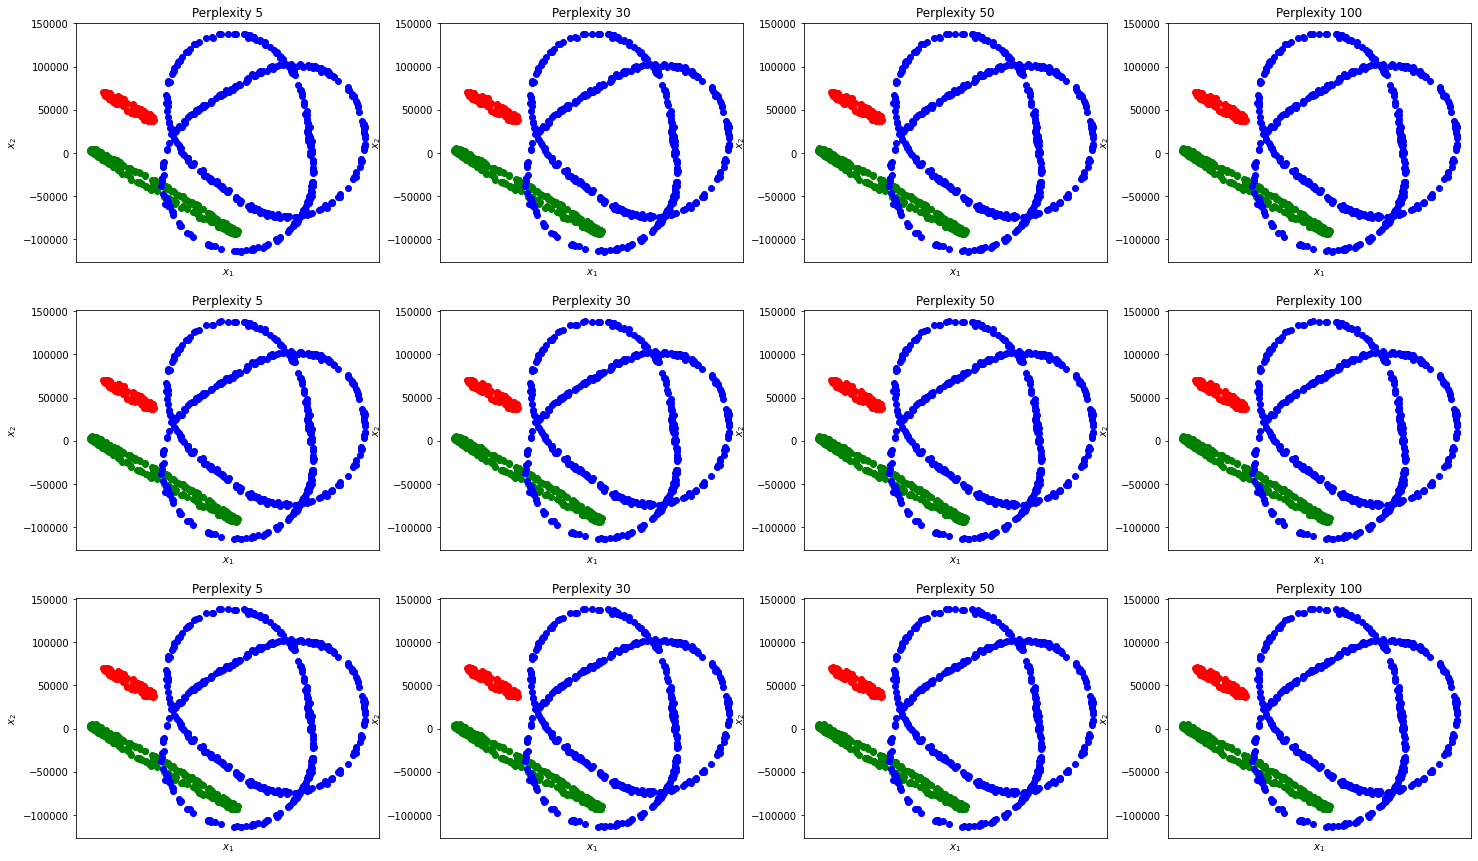

In [6]:
fig, ax = plt.subplots(3,4, figsize=(25,15))
perplexity_list = [5,30,50,100]

for i in range(3):
    for j in range(len(perplexity_list)):
        X_embedded = TSNE(n_components=2,  perplexity=perplexity_list[j], init='pca').fit_transform(df)
        x = np.array([X_embedded[j][0] for j in range(X_embedded.shape[0])] )
        y = np.array([X_embedded[j][1] for j in range(X_embedded.shape[0])] )
        ax[i][j].set_title(f'Perplexity {perplexity_list[j]}')
        ax[i][j].set_xlabel('$x_1$')
        ax[i][j].set_ylabel('$x_2$')
        ax[i][j].scatter(x[red],y[red], color = 'red')
        ax[i][j].scatter(x[green],y[green], color = 'green')
        ax[i][j].scatter(x[blue],y[blue], color = 'blue')
        ax[i][j].set_xticks([])

plt.show()

## 3D t-SNE

We now apply the t-SNE method to the dataset, looking for an embedded space of dimension 3.

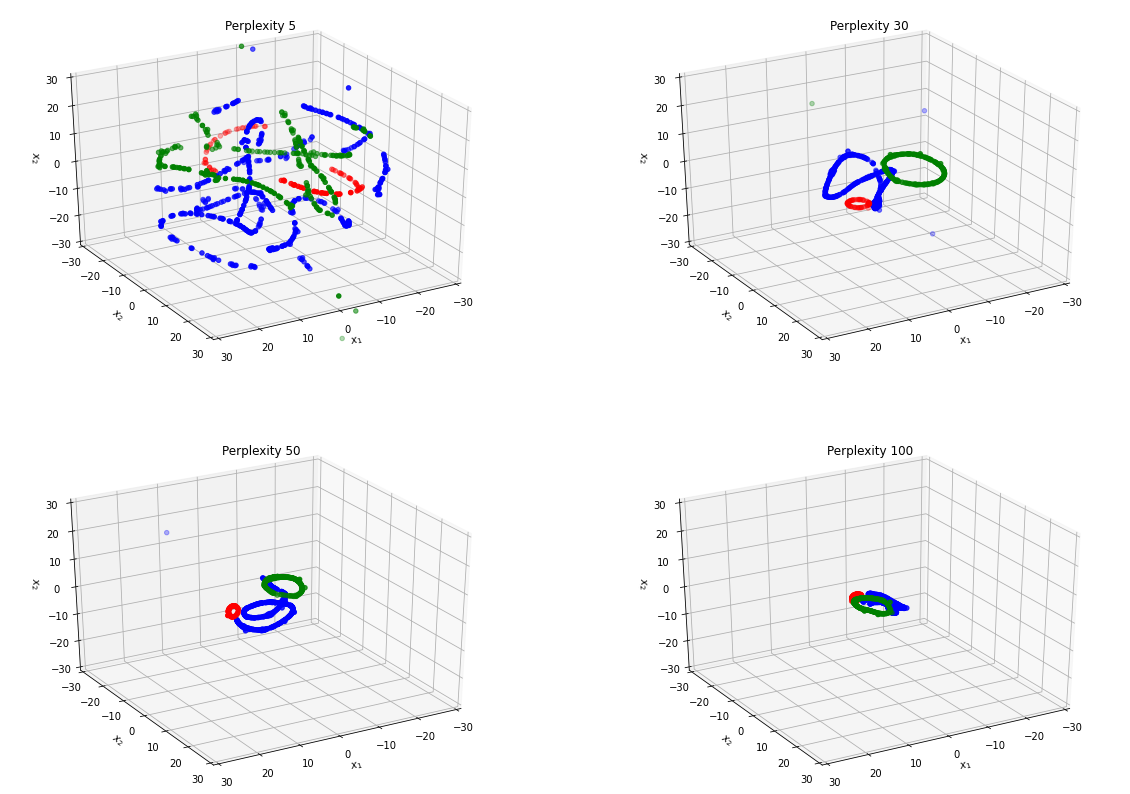

In [7]:
fig = plt.figure(figsize=(20,30))

for i in range(len(perplexity_list)):
    ax   = fig.add_subplot(len(perplexity_list), 2, i+1, projection='3d')
    X_embedded = TSNE(n_components=3, perplexity=perplexity_list[i]).fit_transform(df)
    x = X_embedded[:,0]
    y = X_embedded[:,1]
    z = X_embedded[:,2]
    ax.set_title(f'Perplexity {perplexity_list[i]}')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$x_2$')
    ax.scatter(x[red],y[red],z[red], color = 'red')
    ax.scatter(x[green],y[green],z[green], color = 'green')
    ax.scatter(x[blue],y[blue],z[blue], color = 'blue')
    ax.set_xlim(-30,30)
    ax.set_ylim(-30,30)
    ax.set_zlim(-30,30)
    ax.view_init(30, 60)

plt.show()

## Optimal EPS calculation

DBSCAN method requires two input parameters to work: the minimum number of points (**minPts**) to be inside an hyper-sphere of radius epsilon to declare a cluster and the epsilon (**eps**) value itself. As multiple reports in the internet suggest ( e.g. the one at https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd), the main idea is, for each data point, to look for the distance to the k-th nearest neighbor (with NearestNeighbours from scikit learn), sort those values, and set as **eps** the distance corresponding to the point of maximum curvature of the plot (the 'elbow crook'). The latter represents the optimal threshold between finding a not-too-big value of **eps** and finding a sufficiently large **eps** so that in most of the cases, a DBSCAN algorithm with **minPts** = k successfully finds clusters.

We show below an example of such analysis: to determine automatically the optimal **eps** for each value of k we observed that the trend of the plotted data in the central region is linear, as is the trend of the last hundred of points after the “elbow”. Therefore, we perform a linear regression on those points and pick as optimal **eps** estimation the ordinate of the point given by the intercept of the two. As the last graphic in this section depicts, this method allows us to estimate in quite a good way the **eps** parameters laying on the point of maximal curvature in a wide range of k under investigation. Finally, we evaluate the behavior of DBSCAN for a set of different **minPts** and for each of them analyze the model for the **eps** found as explained above, and some multiples of this value.


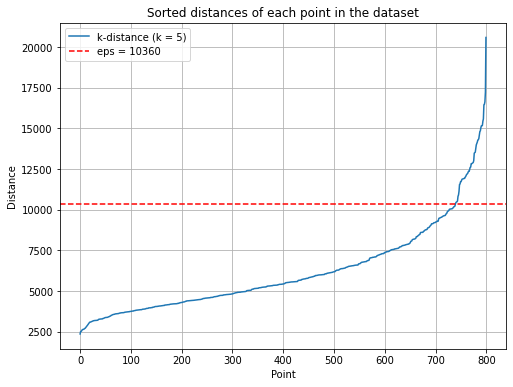

In [8]:
minPts = 5

plt.figure(figsize=(8,6))

def find_slope(dist, pct = 0.015):
    '''
    
    function for finding the 1.5% slope of the curvature
    
    '''
    flag = 0
    epsilon = 0
    for i in range(200,len(dist)):
        if flag == 0: 
            if dist[i]/dist[i-1] > (1+pct):
                epsilon = (dist[i]+dist[i-1])/2.
                flag = 1 
            else: epsilon = max(dist)
    return epsilon

def find_slope2(dist):
    '''
    
    function for finding the two lines interception point
    
    '''
    xs = np.arange(len(dist))
    k1 = int(0.82*len(dist))
    k2 = len(dist) - 50
    fit1 = np.polyfit(xs[k1:k1+50],dist[k1:k1+50],1)
    m1 = fit1[0]
    q1 = fit1[1]
    fit2 = np.polyfit(xs[k2:k2+50],dist[k2:k2+50],1)
    m2 = fit2[0]
    q2 = fit2[1]
    eps = (q1*m2-q2*m1)/(m2-m1)
    return eps

def eps_estimator(dataset, minPts = 2, metric = 'l2'):
    '''
    
    function for finding the EPS given a dataset, minpts and the metric (l2 = Euclidean)
    
    '''
    neighbors = NearestNeighbors(n_neighbors=minPts, metric = metric)
    neighbors_fit = neighbors.fit(dataset)
    distances, indices = neighbors_fit.kneighbors(dataset)
    #Keep further points distances
    distances = distances[:,-1]
    #ordering distances from smaller to higher
    distances = np.sort(distances, axis=0)
    #find epsilon
    if metric == 'l1': eps = find_slope(distances)
    else : eps = find_slope2(distances)
    return eps, distances

dataset = df_raw.copy()
eps, distances = eps_estimator(dataset, minPts=minPts)

#plt.plot((distances[1:]-distances[:-1])*10, label = 'k-distance (k = 2)')
plt.plot(distances, label = 'k-distance (k = 5)')
plt.title('Sorted distances of each point in the dataset')
plt.xlabel('Point')
plt.ylabel('Distance')
plt.axhline(eps, c='r', ls = '--', label = 'eps = {}'.format(int(eps)))
plt.legend()
plt.grid()
plt.show()

## Varying the number of Nearest Neighbours

Here we report the eps obtained by varying (between 2 and 14) the number of considered nearest neighbours.

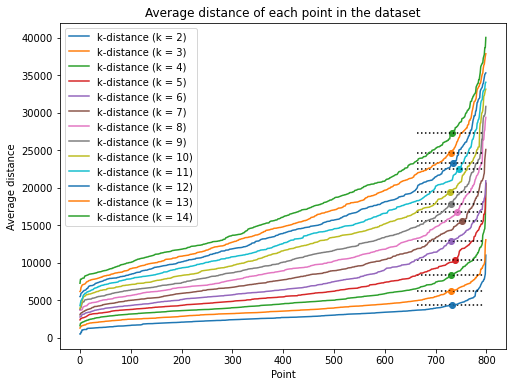

In [9]:
plt.figure(figsize=(8,6))
def find_slope(dist, pct = 0.01):
    flag = 0
    epsilon = 0
    for i in range(200,len(dist-1)):
        if flag == 0: 
            if dist[i+1]/dist[i] > (1+pct):
                epsilon = (dist[i]+dist[i+1])/2.
                flag = 1 
            else: epsilon = max(dist)
    return epsilon

dataset = df_raw.copy()
n_neighbours=np.arange(2,15,1)


for i in range(len(n_neighbours)):
    eps, distances = eps_estimator(dataset, minPts=n_neighbours[i])
    plt.axhline(eps, ls = 'dotted', xmin=0.8, xmax=0.95, c='k' )
    flag=0
    k=0
    for j in range(len(distances)):
        if flag==0:
            if distances[j]>eps:
                flag=1
                k=j    
        
    plt.scatter(k, eps)
    plt.plot(distances, label = f'k-distance (k = {n_neighbours[i]})')
    
plt.title('Average distance of each point in the dataset')
plt.xlabel('Point')
plt.ylabel('Average distance')
plt.legend()
plt.show()

As we can see, when we increase the number of the nearest neighbours (k-distance) from a given point the maximum distances considered increase, while maintaining the same shape. On the right-hand side we reported the points corresponding to the value of eps estimated as we discussed above.

## DBSCAN clustering algorithm

We report here the output of the DBSCAN clustering and we study its behaviour for different values of the **eps** parameter and of **minPts** parameter.

In [10]:
cpalette = ['k', 'r', 'g', 'b', 'y',"#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F", 'gainsboro']

def clustering(y):
    '''
    
    function for finding the positions of labels,
    it returns a dictionary of cluster labels to data indices.
    
    ''' 
    yu = np.sort(np.unique(y))
    clustering = OrderedDict()
    for ye in yu:
        clustering[ye] = np.where(y == ye)[0]
    return clustering

def NMI(y_true, y_pred):
    '''
    
    function for computing normalized mutual information,
    where y_true and y_pred are both clustering assignments
    
    ''' 
    w = clustering(y_true)
    c = clustering(y_pred)
    n_sample = len(y_true)

    Iwc = 0.
    for kw in w.keys():
        for kc in c.keys():
            w_intersect_c=len(set(w[kw]).intersection(set(c[kc])))
            if w_intersect_c > 0:
                Iwc += w_intersect_c*np.log(n_sample*w_intersect_c/(len(w[kw])*len(c[kc])))
    Iwc/=n_sample
    Hc = entropy(c,n_sample)
    Hw = entropy(w,n_sample)

    return 2*Iwc/(Hc+Hw)

def entropy(c, n_sample):
    '''
    
    function for measuring the entropy of a cluster
    
    ''' 
    h = 0.
    for kc in c.keys():
        p=len(c[kc])/n_sample
        h+=p*np.log(p)
    h*=-1.
    return h

def plotting_ax(X, y, ax):
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        if yu < 0 : ax.scatter(X[pos,0], X[pos,1],c=cpalette[-1],s=4)
        else: ax.scatter(X[pos,0], X[pos,1],c=cpalette[i%len(cpalette)],s=4)

In [11]:
X_embedded = TSNE(n_components=2,  perplexity=30).fit_transform(df)

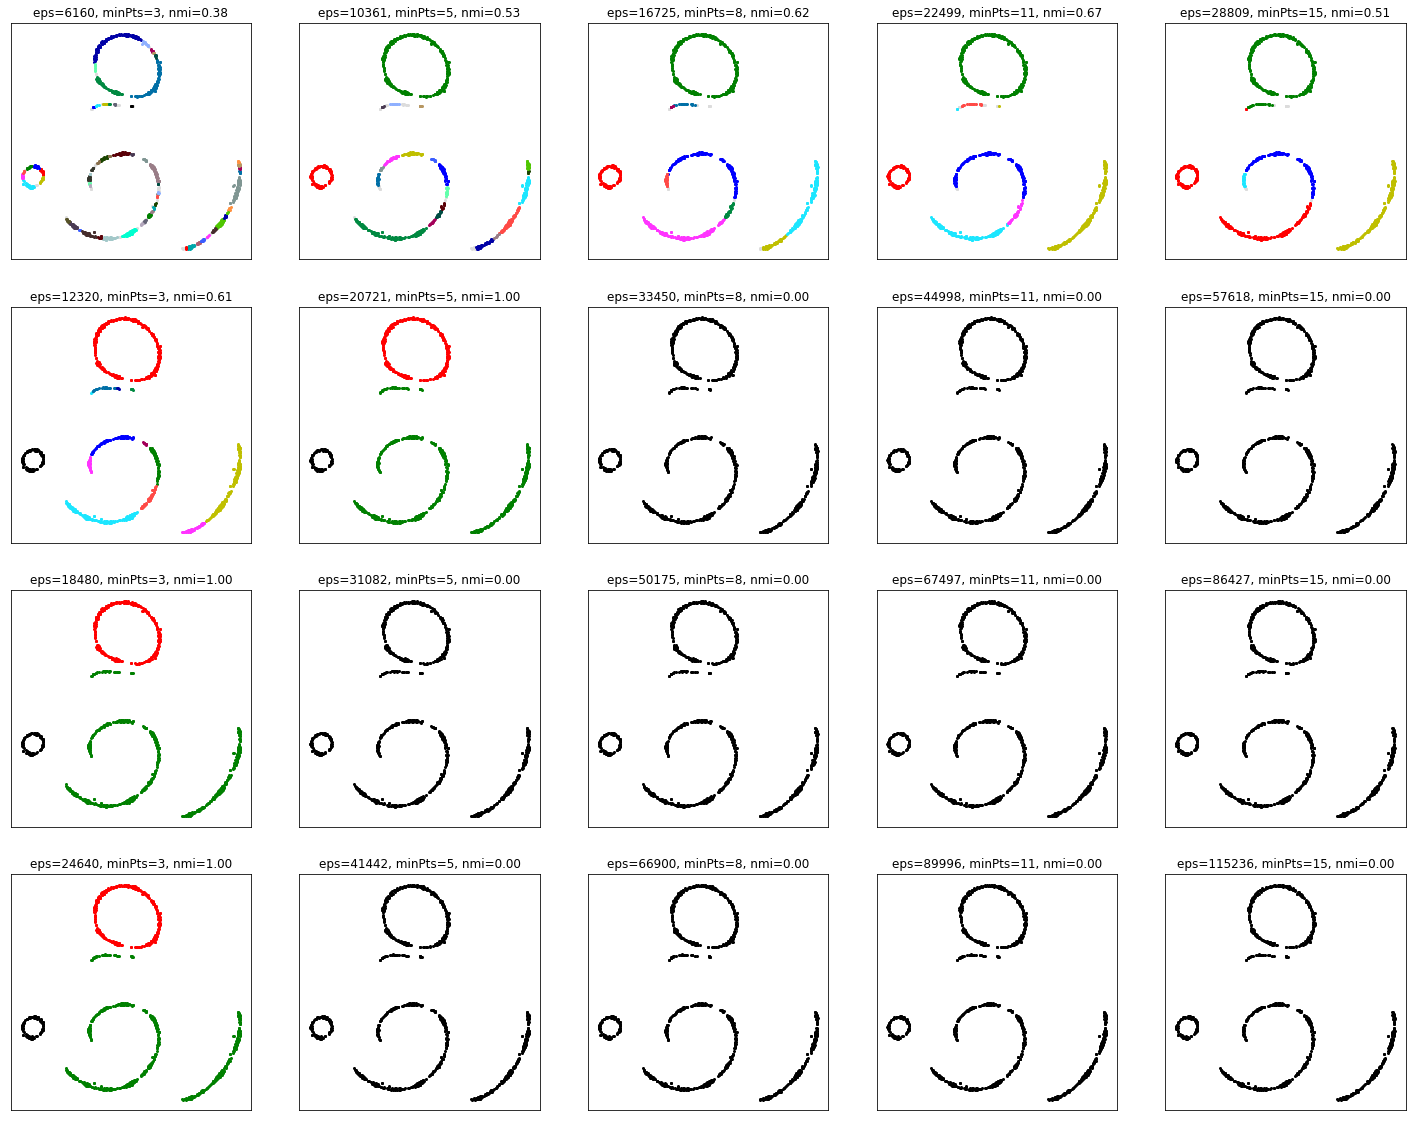

In [12]:
X = df_raw.to_numpy()
y_true = df['label']
metric = 'l2'

eps_range_len = 4
min_sample_range = [3,5,8,11,15]
fig, ax = plt.subplots(eps_range_len,len(min_sample_range),figsize=(25,20))

for j, min_samples in enumerate(min_sample_range):
    e, dists = eps_estimator(X, minPts=min_samples, metric = metric)
    eps_range = np.arange(1,1+eps_range_len) * e
    for i, eps in enumerate(eps_range):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(X)
        y = model.labels_
        plotting_ax(X_embedded,y,ax[i,j])
        nmi=NMI(y, y_true)
        ax[i,j].set_title('eps=%.0f, minPts=%i, nmi=%.2f'%(eps,min_samples,nmi))
        ax[i,j].get_xaxis().set_ticks([])
        ax[i,j].get_yaxis().set_ticks([])

plt.show()

Clearly, the best clustering performance is reached when we use a low **minPts** value and we see that in both cases of minPts=3 and minPts=5 the best **eps** are within the multiples of the base value found with the method describe above. By looking at the first line we observe how our method for finding **eps** provides a good starting point in the research of the optimal one for **every minPts** chosen.

# Part 2

Now we change the dataset to a 36-dimensional one.

### Data import and labelling

In [35]:
#importing the file of sequences
xfile = 'DATA/x_M5_N400.csv'
yfile = 'DATA/y_M5_N400.csv'

df2 = pd.read_csv(xfile, delimiter=' ',header=None)
labels2 = pd.read_csv(yfile, delimiter=' ',header=None)

In [26]:
df2.head(5)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0,1,1,1,1,1,1,0,1,0,...,1,0,0,1,1,1,1,0,0,1
1,1,1,1,1,1,1,0,0,1,0,...,0,1,1,1,0,0,1,0,1,0
2,0,0,1,1,0,1,0,0,0,1,...,1,0,0,1,0,1,0,1,0,0
3,0,1,1,1,0,1,0,0,0,0,...,0,1,0,1,0,0,1,1,0,1
4,0,1,0,1,1,1,0,1,0,1,...,1,0,1,1,0,1,1,0,0,1


In [27]:
labels2.head(5)

,0
0,1
1,3
2,2
3,3
4,2


### Dataset visualization

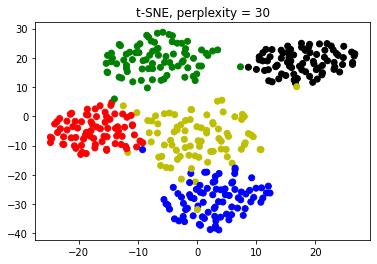

In [16]:
mycol = ['k', 'r', 'g', 'b', 'y']
cmap = ListedColormap(mycol)

X_embedded = TSNE(n_components=2,  perplexity=30).fit_transform(df2)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c = labels2, cmap = cmap)
plt.title('t-SNE, perplexity = 30')

plt.show()


### Q: Why are points for y=1 (red) close to those with y=4 (yellow) in t-SNE?

**A:** Looking at the function that generates and labels the sequences, we could notice that the sequences corresponding to y=1 and y=4 present four identical values and the other '0s' and '1s' are in similar ranges. This mean that, on average, more than one half of the bits of the sequences with those labels are equal: this leads to have closer clusters.

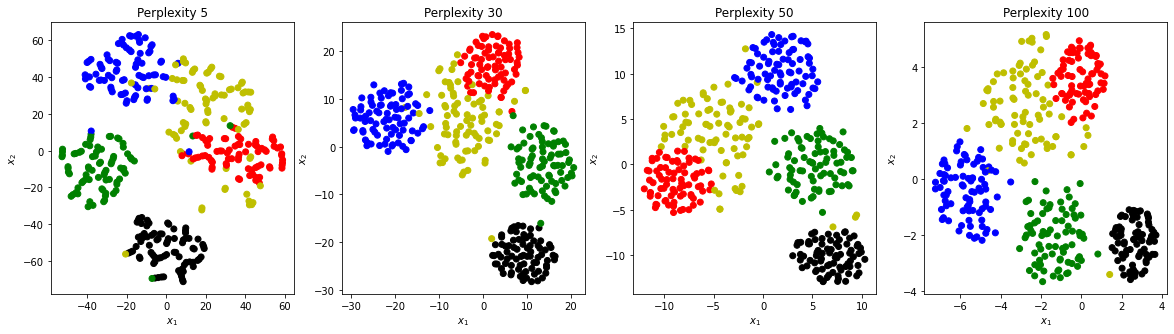

In [17]:
fig, ax = plt.subplots(1,4, figsize=(20,5))
perplexity_list = [5,30,50,100]

for j in range(len(perplexity_list)):
    X_embedded = TSNE(n_components=2,  perplexity=perplexity_list[j]).fit_transform(df2)
    ax[j].scatter(X_embedded[:,0], X_embedded[:,1], c = labels2, cmap = cmap)
    ax[j].set_title(f'Perplexity {perplexity_list[j]}')
    ax[j].set_xlabel('$x_1$')
    ax[j].set_ylabel('$x_2$')

plt.show()

From the plots at different values of perplexity, we can see for which ones the clustering turn out to be more succesfull: for both values of perplexity equal to 30 and 50 the clusters are isolated resembling the colours, whereas for the lowest and the highest perplexity value the algorithm starts to mix the different clusters.

## 2D t-SNE and best eps 

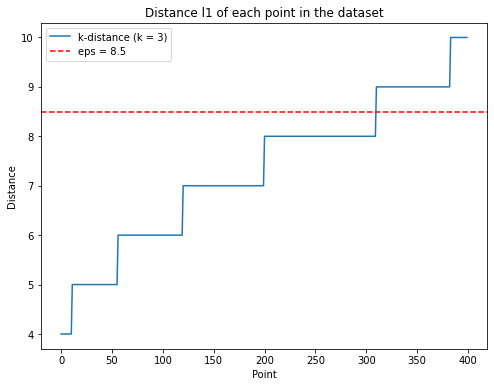

In [28]:
X_embedded = TSNE(n_components=2,  perplexity=30).fit_transform(df2)

metric = 'l1'

plt.figure(figsize=(8,6))
def find_slope(dist, pct = 0.01):
    flag = 0
    epsilon = 0
    for i in range(200,len(dist)):
        if flag == 0: 
            if dist[i+1]/dist[i] > (1+pct):
                epsilon = (dist[i]+dist[i+1])/2.
                flag = 1 
    return epsilon

dataset = df2.copy()

eps, distances = eps_estimator(dataset, minPts=3, metric=metric)

plt.plot(distances, label = 'k-distance (k = 3)')
plt.title('Distance ' + metric + ' of each point in the dataset')
plt.xlabel('Point')
plt.ylabel('Distance')
plt.axhline(eps, c='r', ls = '--', label = 'eps = {}'.format((eps)))
plt.legend()

plt.show()

The graph above depicts the sorted distances between the sequences. In this case we adopted the l1 metric and the previous way to estimate **eps** is not suitable anymore. Therefore, we decide to choose it as the mean value at which the increment between one value and the following one is bigger than 1.5%. 

## DBSCAN analysis

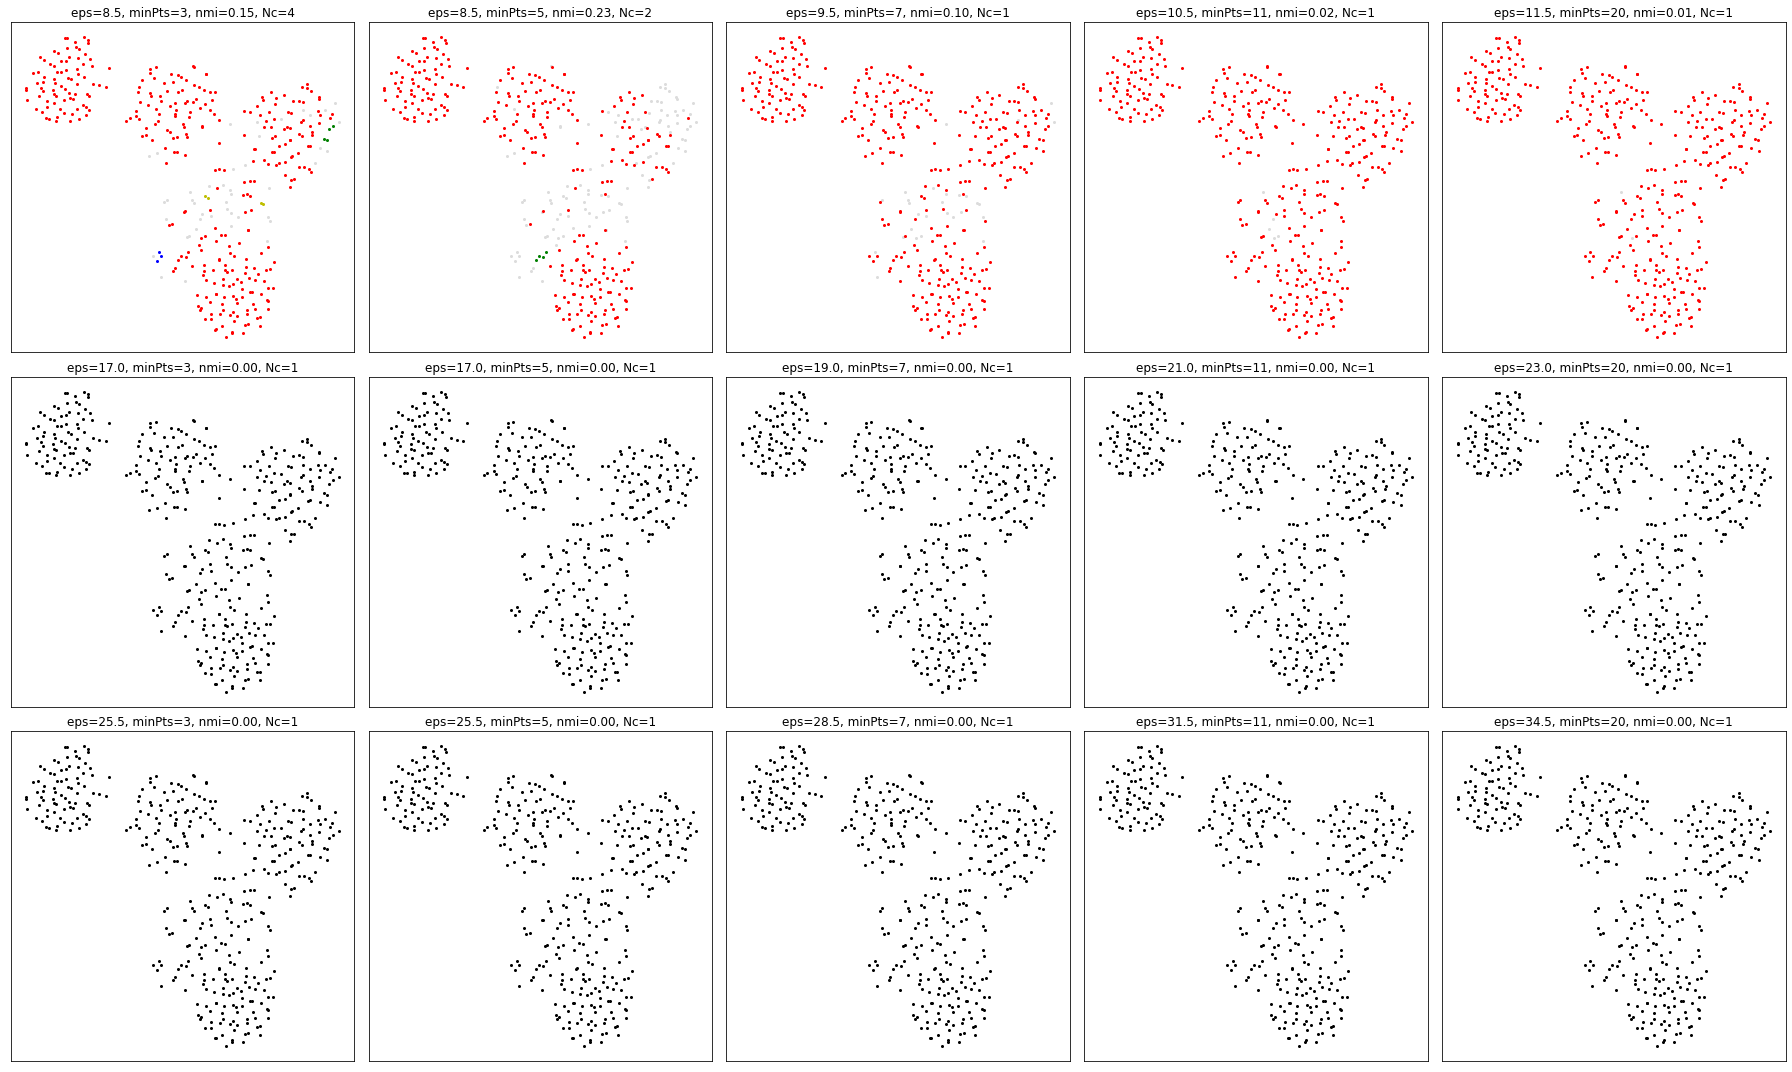

In [20]:
X = df2.to_numpy()
y_true = labels2
metric = 'l1'

eps_range_len = 3
min_sample_range = [3,5,7,11,20]
fig, ax = plt.subplots(eps_range_len,len(min_sample_range),figsize=(25,15))
n_labels_for_method = []
nmis = []

for j, min_samples in enumerate(min_sample_range):
    e, dists = eps_estimator(X, minPts=min_samples, metric = metric)
    eps_range = np.arange(1,1+eps_range_len) * e
    for i, eps in enumerate(eps_range):
        model = DBSCAN(eps=eps, min_samples=min_samples, metric = metric)
        model.fit(X)
        y = model.labels_
        #keeping track on the number of labels for each method
        n_labels_for_method.append(list(set(y)))
        plotting_ax(X_embedded,y,ax[i,j])
        nmi=NMI(y, y_true)
        nmis.append(nmi)
        Nc = max(y)+1
        ax[i,j].set_title('eps=%.1f, minPts=%i, nmi=%.2f, Nc=%i'%(eps,min_samples,nmi, Nc))
        ax[i,j].get_xaxis().set_ticks([])
        ax[i,j].get_yaxis().set_ticks([])
        
plt.tight_layout(h_pad=0.5)
plt.show()

As we can infer from the graphs just above, the DBSCAN has a poor performance over the 36-dimensional dataset. We will further comment this results in the last cell of the notebook. Next, we apply DBSCAN on the data obtained after the t-SNE algorithm.

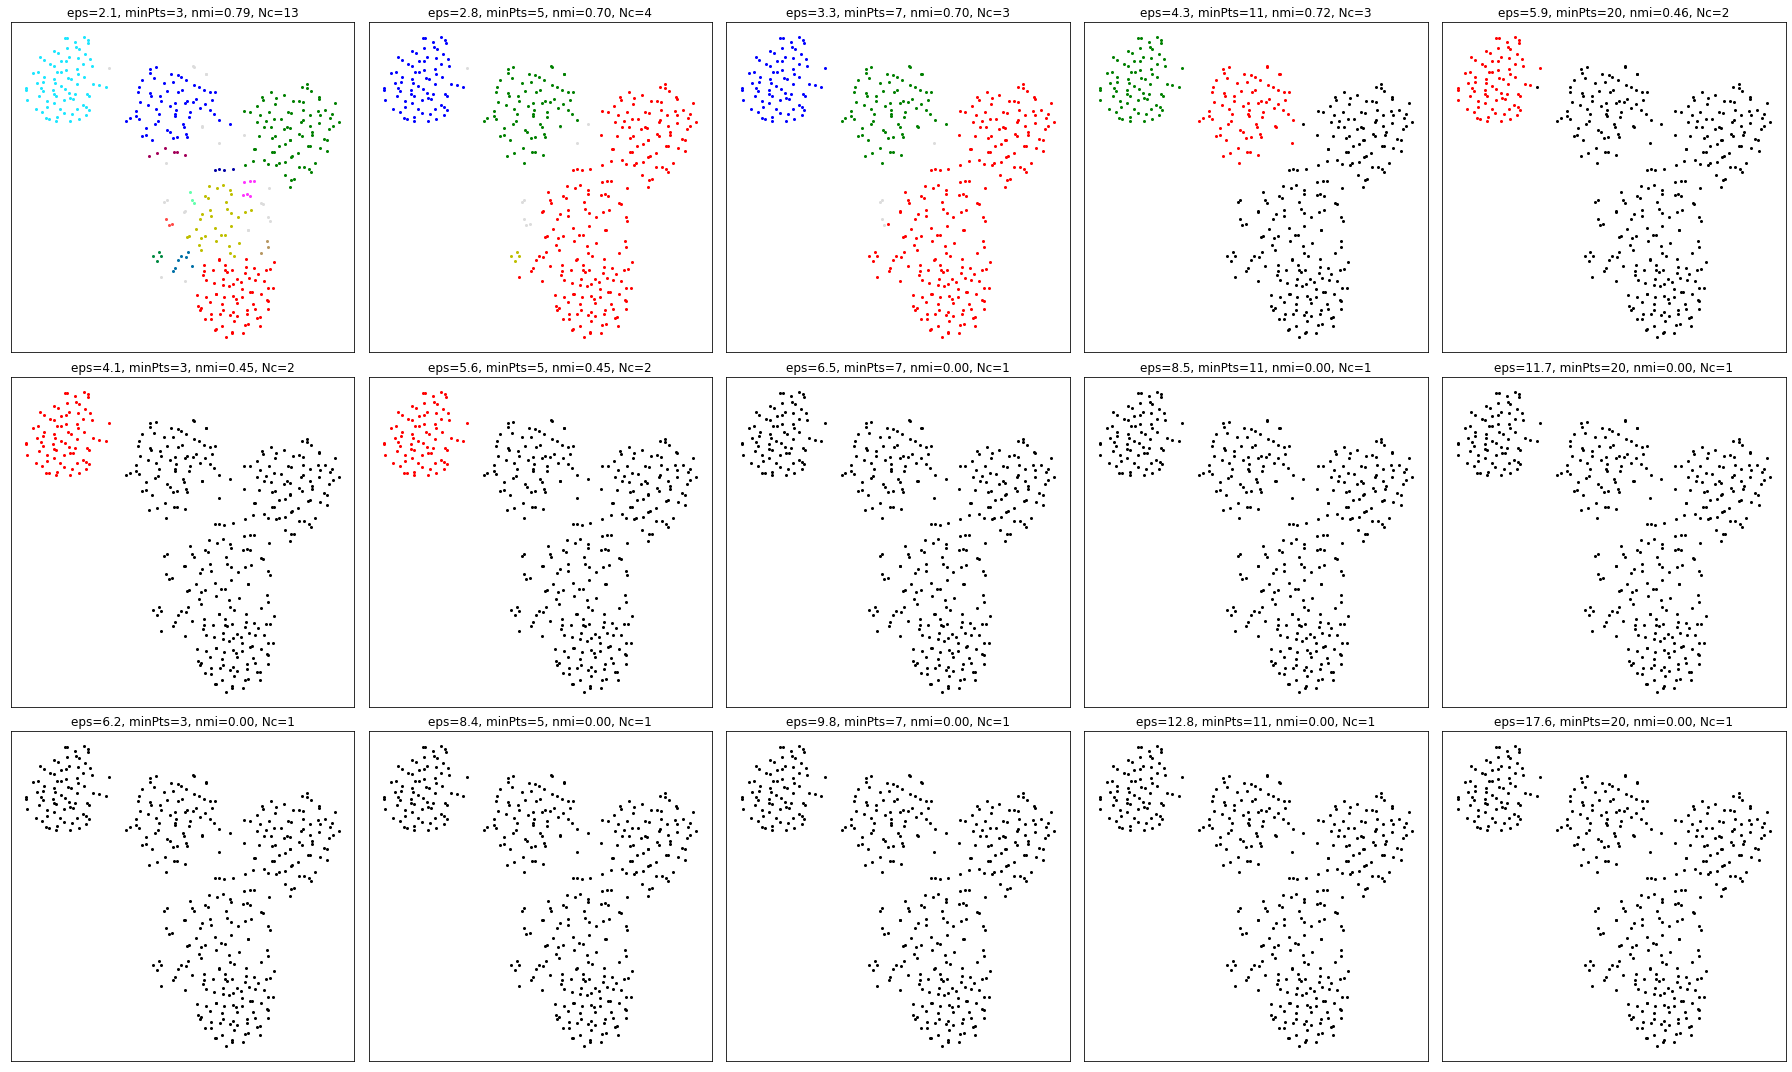

In [21]:
X = X_embedded
y_true = labels2
metric = 'l2'

eps_range_len = 3
min_sample_range = [3,5,7,11,20]
fig, ax = plt.subplots(eps_range_len,len(min_sample_range),figsize=(25,15))
n_labels_for_method = []
nmis_tsne = []

for j, min_samples in enumerate(min_sample_range):
    e, dists = eps_estimator(X, minPts=min_samples, metric = metric)
    eps_range = np.arange(1,1+eps_range_len) * e
    for i, eps in enumerate(eps_range):
        model = DBSCAN(eps=eps, min_samples=min_samples, metric = metric)
        model.fit(X)
        y = model.labels_
        #keeping track on the number of labels for each method
        n_labels_for_method.append(list(set(y)))
        plotting_ax(X_embedded,y,ax[i,j])
        nmi_tsne=NMI(y, y_true)
        nmis_tsne.append(nmi_tsne)
        Nc = max(y)+1
        ax[i,j].set_title('eps=%.1f, minPts=%i, nmi=%.2f, Nc=%i'%(eps,min_samples,nmi_tsne, Nc))
        ax[i,j].get_xaxis().set_ticks([])
        ax[i,j].get_yaxis().set_ticks([])
plt.tight_layout(h_pad=0.5)
plt.show()

Below here we report the histogram of the obtained mni before and after the t-SNE method:
as it is shown, after t-SNE the counts on the 0-centered bin are re-distributed at higher-values-centered bins, revealing an overall better performance.

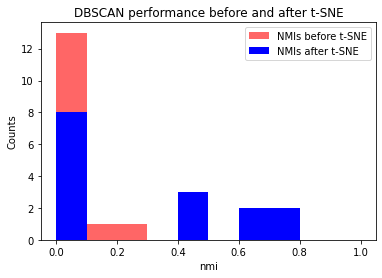

In [33]:
plt.hist(nmis, bins=10, range=[0,1], label='NMIs before t-SNE', color='r', alpha=0.6)
plt.hist(nmis_tsne, bins=10, range=[0,1], label='NMIs after t-SNE', color='b')
plt.title('DBSCAN performance before and after t-SNE')
plt.xlabel('nmi')
plt.ylabel('Counts')
plt.legend()

plt.show()

### Q: In this second example you may find that t-SNE does perform well in grouping the clusters while DBSCAN does not. What is your explanation?

**A:** As we can see from the graphs above, t-SNE manages to cluster data in a quite good way, while DBSCAN acting on the whole dataset fails to recognize properly groups of points. This can be either due to the high dimensionality of the dataset or to the binary nature of the features, meaning that in a 36-dimensional space they distribute in a lattice of organized points. As a result, a density-based algorithm could fail in determine agglomerates, given the fact that points are actually organized in density centers. On the other hand, the last plot shows that the DBSCAN algorithm working on data already distributed in a 2-dimensional space by t-SNE with a larger range of values per feature works properly and manage to produce a clustering similar to the one of t-SNE (reaching also better values of nmi).